# US-Wildfire-Analysis_Final Report

## Introduction
**Wildfires** are a common problem for America. Every year wildfire is one of the most destructive disaster across US. These wildfires result into fire-cloud-forming, megafires, burning about 4-5 million acres of land, mobilizing tens of thousands of firefighters, razing thousands of buildings, and sometimes killing people.

## Data Dictionary
This data is collected from [https://www.kaggle.com/rtatman/188-million-us-wildfires?] This data publication contains a spatial database of wildfires that occurred in the United States from 1992 to 2015. Fires table has all these details. 

## Targeted Problems:
* Did the number of wildfires per year increase over a period of time? 
* Average destruction caused per year, and has it increased over the years?
* Analyse the wildfire occurrences based on fire size class.
* Find out the number of fires for each class per year.
* What states are more and less susceptible for wildfire?
* Analyse the different causes of wildfires.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data
Reading the data in data directory

In [2]:
fires = pd.read_csv('data/Fires_pruned.csv')

/home/tejasvi/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11,12,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


checking the number of rows and columns in the dataset.

In [3]:
fires.shape

(274170, 39)

checking the column names and data using head()

In [4]:
pd.set_option('display.max_columns', 45)
fires.head(5)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,109,23,NaN,POWER,CA-ENF-017646,POWER,CA3850212028020041006,POWER,NaN,2004,2453284.5,280,1415.0,2.0,Equipment Use,2453299.5,295.0,1000.0,16823.0,G,38.523333,-120.211667,5.0,USFS,CA,5,5.0,Amador,NaN
1,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,111,35,BHA3,FREDS,CA-ENF-18044,FREDS,CA3878712031820041013,FREDS,NaN,2004,2453291.5,287,1618.0,2.0,Equipment Use,2453295.5,291.0,1800.0,7700.0,G,38.780000,-120.260000,5.0,USFS,CA,17,17.0,El Dorado,NaN
2,26,26,FS-1418897,FED,FS-FIRESTAT,FS,USNMLNF,Lincoln National Forest,0308,Lincoln National Forest,22,NM-LNF-022,AVP4,BACHELOR,NaN,NaN,NaN,NaN,NaN,2004,2453206.5,202,1405.0,1.0,Lightning,2453206.5,202.0,1600.0,10.0,C,33.315833,-105.512222,5.0,USFS,NM,27,27.0,Lincoln,NaN
3,38,38,FS-1418918,FED,FS-FIRESTAT,FS,USNCNCF,National Forests in North Carolina,0811,National Forests in North Carolina,2,002,BJ66,HOWARD GAP,NaN,NaN,NaN,NaN,NaN,2005,2453397.5,27,2200.0,7.0,Arson,2453398.5,28.0,300.0,50.3,C,35.000278,-83.351111,5.0,USFS,NC,113,113.0,Macon,NaN
4,40,40,FS-1418920,FED,FS-FIRESTAT,FS,USNCNCF,National Forests in North Carolina,0811,National Forests in North Carolina,4,2,BKC8,AUSTIN CREEK,NC-NCS-050201401,Austin Creek,NaN,NaN,NaN,2005,2453413.5,43,1520.0,5.0,Debris Burning,2453414.5,44.0,330.0,125.0,D,36.001667,-81.590000,14.0,MISSING/NOT SPECIFIED,NC,27,27.0,Caldwell,NaN


# Identify null values
finding the columns having null values

In [5]:
fires.isnull().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          222615
LOCAL_INCIDENT_ID             127877
FIRE_CODE                     226472
FIRE_NAME                     145509
ICS_209_INCIDENT_NUMBER       251921
ICS_209_NAME                  251921
MTBS_ID                       263183
MTBS_FIRE_NAME                263183
COMPLEX_NAME                  270937
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                129979
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     136793
CONT_DOY                      136793
C

# Problem1:
Did the number of wildfires per year increase over a period of time?

So, we mainly need fire year column and we need to count the number of fires per year. Also, sorting it in ascending order.

In [6]:
fires['FIRE_YEAR'].value_counts().sort_index()

1992     9454
1993     9025
1994    11232
1995    10695
1996    12608
1997     7840
1998     9497
1999    13982
2000    15240
2001    11109
2002     9852
2003     8186
2004     9124
2005    14053
2006    20540
2007    13483
2008    13489
2009    11633
2010    11398
2011    15352
2012    10443
2013     7152
2014     8769
2015    10014
Name: FIRE_YEAR, dtype: int64

Plotting this data

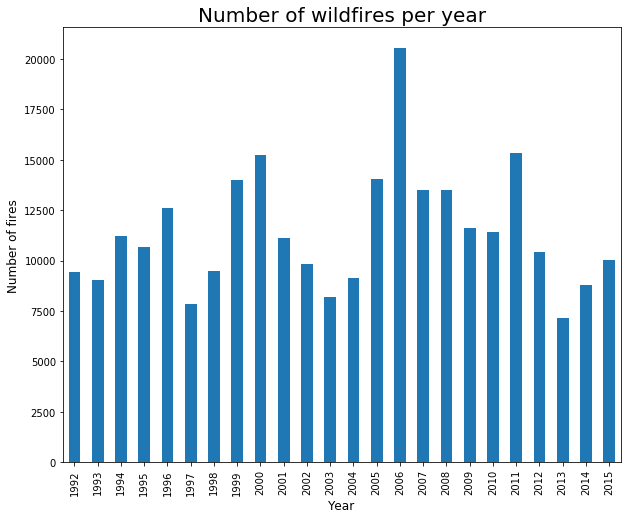

In [7]:
fires['FIRE_YEAR'].value_counts().sort_index().plot(kind = 'bar',\
                                       figsize = (10, 8));
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Number of fires', fontsize = 12);
plt.title('Number of wildfires per year', fontsize=20);

## Conclusion: 
* In 2006 maximum incidents of wildfires took place 
* Around 10,000 - 15,000 incidents of wildfire take place every year.

# Problem2:
Average destruction caused per year, and has it increased over the years?

we have FIRE_SIZE column telling the size of fire in acres. Grouping by Fire size and Fire Year to get this data. Below query gives average area burnt per year, due to all types of wild fires.

In [8]:
fires[['FIRE_YEAR', 'FIRE_SIZE']]\
                       .groupby('FIRE_YEAR')\
                       .mean()

,FIRE_SIZE
FIRE_YEAR,
1992,224.656221
1993,234.725108
1994,359.141743
1995,183.707429
1996,469.304078
1997,400.779065
1998,203.133587
1999,426.682826
2000,493.746423


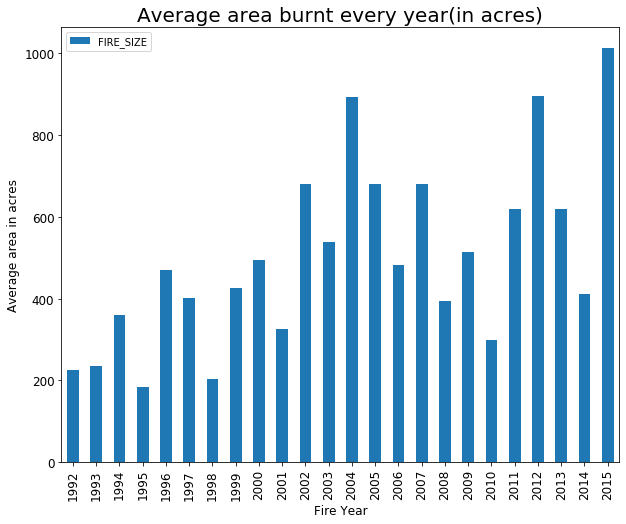

In [9]:
fires[['FIRE_YEAR', 'FIRE_SIZE']]\
                       .groupby('FIRE_YEAR')\
                       .mean().plot(kind = 'bar',\
                        figsize = (10, 8),\
                        fontsize = 12);
plt.xlabel("Fire Year", fontsize = 12);
plt.ylabel ("Average area in acres", fontsize = 12);
plt.title('Average area burnt every year(in acres)', fontsize=20);

## Conclusion: 
This concludes that the average area affected by wildfires has gradually increaded over the period of time.

# Problem3:
Analyse the wildfire occurrences based on fire size class.

We have FIRE_SIZE_CLASS column, where
* C=10.0-99.9 acres, 
* D=100-299 acres, 
* E=300 to 999 acres, 
* F=1000 to 4999 acres, and 
* G=5000+ acres

In [10]:
fires_grouped_by_Fireclass = fires.groupby('FIRE_SIZE_CLASS').size()
fires_grouped_by_Fireclass

FIRE_SIZE_CLASS
C    220077
D     28427
E     14107
F      7786
G      3773
dtype: int64

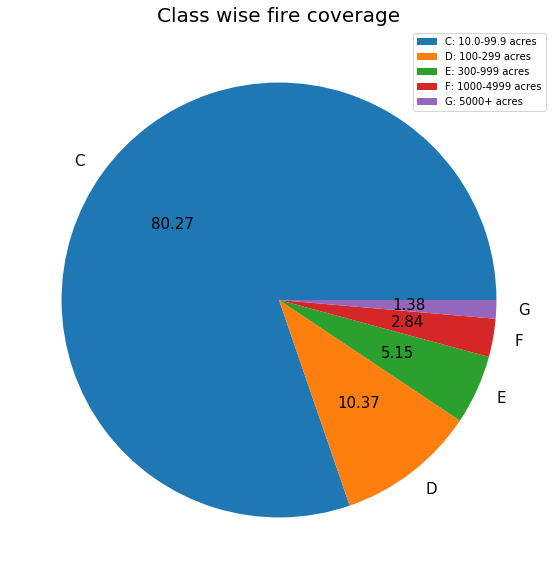

In [11]:
fires_grouped_by_Fireclass.plot(kind = 'pie', \
                                autopct='%1.2f',\
                                    label = '',\
                                    figsize = (10, 10),\
                                    fontsize = (15) \
                               );
labels=['C: 10.0-99.9 acres', 'D: 100-299 acres', 'E: 300-999 acres', 'F: 1000-4999 acres', 'G: 5000+ acres']
plt.legend(labels, loc='upper right');
plt.title('Class wise fire coverage', fontsize=20);

# Problem4:
Find out the number of fires for each class per year.

First creating a dataframe with only two columns fire_year and fire_size_class

In [12]:
fires_peryear_byclass = fires.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS'])\
                             .size().reset_index()\
                             .rename(columns={0:'NUMBER_OF_FIRES'})
fires_peryear_byclass

,FIRE_YEAR,FIRE_SIZE_CLASS,NUMBER_OF_FIRES
0,1992,C,7955
1,1992,D,876
2,1992,E,368
3,1992,F,197
4,1992,G,58
...,...,...,...
115,2015,C,7720
116,2015,D,1098
117,2015,E,568
118,2015,F,336


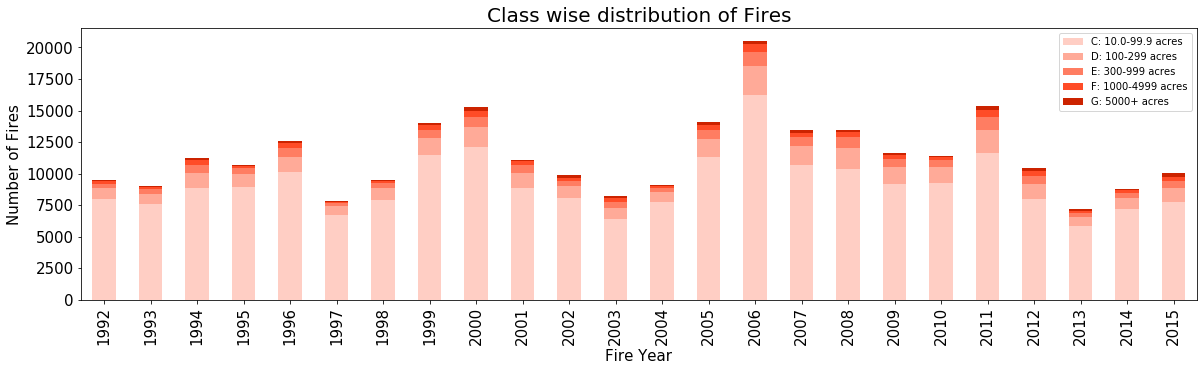

In [13]:
pivot_df = fires_peryear_byclass.pivot(index='FIRE_YEAR', columns='FIRE_SIZE_CLASS',values='NUMBER_OF_FIRES')

colors = ["#FFCEC4", "#FFAA98","#FF7D62", "#FF4C27", "#CC2300"]

pivot_df.loc[:,['C','D', 'E', 'F', 'G']].plot.bar(stacked=True, color=colors, figsize=(20,5), fontsize=15);
plt.xlabel("Fire Year", fontsize = 15);
plt.ylabel("Number of Fires", fontsize = 15);
labels=['C: 10.0-99.9 acres', 'D: 100-299 acres', 'E: 300-999 acres', 'F: 1000-4999 acres', 'G: 5000+ acres']
plt.legend(labels, loc='upper right');
plt.title('Class wise distribution of Fires', fontsize=20);

analysing the occurance of large fires ie fire_size_class 'G'.

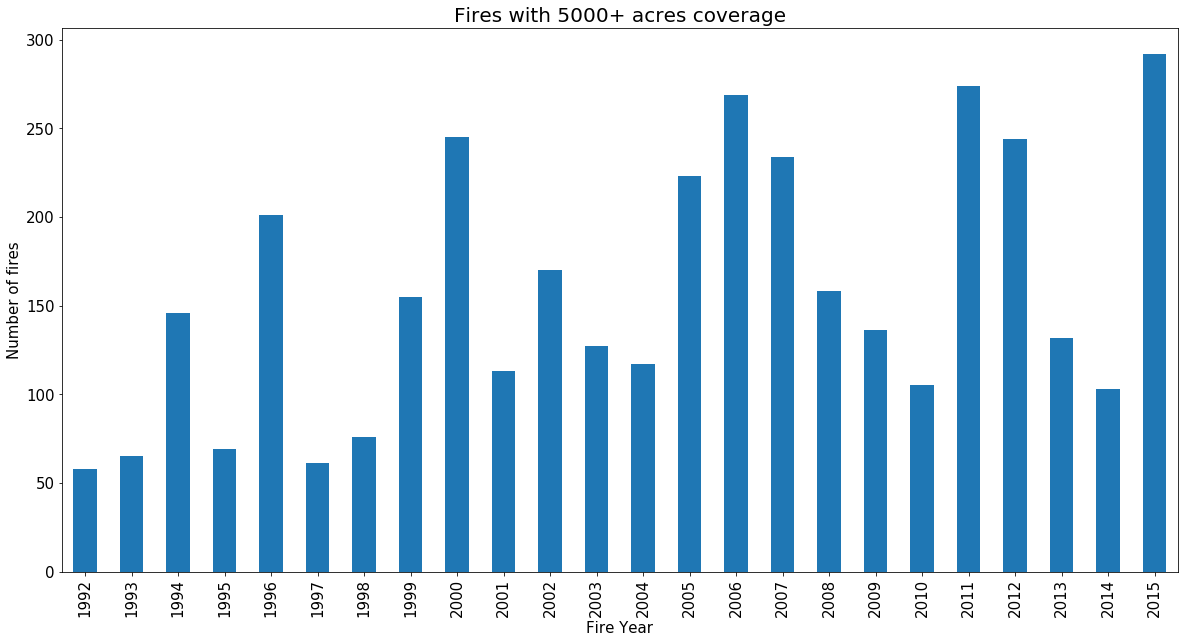

In [14]:
Gclass = fires_peryear_byclass["FIRE_SIZE_CLASS"].isin(["G"])
fires_peryear_Gclass = fires_peryear_byclass[Gclass]\
                            .set_index('FIRE_YEAR')
fires_peryear_Gclass.plot(kind = 'bar', figsize = (20,10), fontsize = 15, legend=False);
plt.title('Fires with 5000+ acres coverage', fontsize=20);
plt.xlabel("Fire Year", fontsize = 15);
plt.ylabel ("Number of fires", fontsize = 15);

# Problem5:
What states are more and less susceptible for wildfire?
Plot first 25 states.

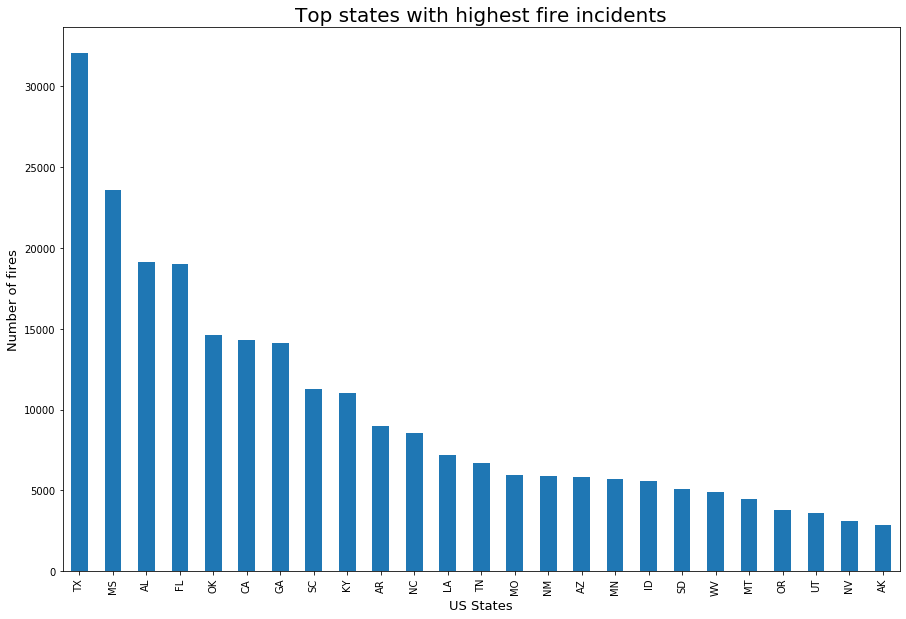

In [15]:
fires_bystate = fires['STATE'].value_counts().head(25)
# fires_bystate
fires_bystate.plot(x = 'STATE', kind = 'bar',\
                   figsize=(15, 10), fontsize=10);
plt.title('Top states with highest fire incidents', fontsize=20);
plt.xlabel("US States", fontsize = 13);
plt.ylabel ("Number of fires", fontsize = 13);

## Conclusion:
Interpretation:- TX, MS, AL , FL, OK, CA, GA, SC, KY are more susptible to fire.

# Problem6:
Analyse the different causes of wildfires

In [16]:
fires.STAT_CAUSE_DESCR.unique()

array(['Equipment Use', 'Lightning', 'Arson', 'Debris Burning',
       'Miscellaneous', 'Campfire', 'Smoking', 'Railroad', 'Children',
       'Powerline', 'Structure', 'Missing/Undefined', 'Fireworks'],
      dtype=object)

In [17]:
fires_cause = fires['STAT_CAUSE_DESCR'].replace({'Miscellaneous':'Missing/Undefined'})
fires_cause.unique()

array(['Equipment Use', 'Lightning', 'Arson', 'Debris Burning',
       'Missing/Undefined', 'Campfire', 'Smoking', 'Railroad', 'Children',
       'Powerline', 'Structure', 'Fireworks'], dtype=object)

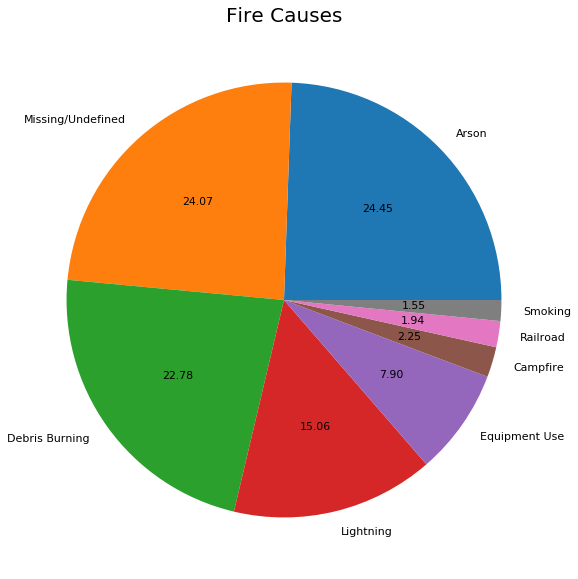

In [18]:
fires_cause.value_counts().head(8).plot.pie(label ='',figsize = (10,10),\
                                             autopct='%1.2f', fontsize= 11);
plt.title('Fire Causes', fontsize=20);

## Conclusion:
There is a very small percentage of natural cause for wild fire.
Most of the wild fire is initiated due to some or the other human activity. So, probably we need more strict guidlines in the forest zones.